### Pipeline gerarchica - Multicompressione

In [22]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from grandiso import find_motifs
from operator import itemgetter
from collections import defaultdict
from pathlib import Path

In [23]:
G1 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\insecta-ant-colony6-day30.edges')

G2 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\aves-wildbird-network-1.edges')

G3 = Path(r'C:\Users\feder\Documents\GitHub\2020_Trevisan\datasets\in\mammalia-dolphin-florida-overall.edges') 

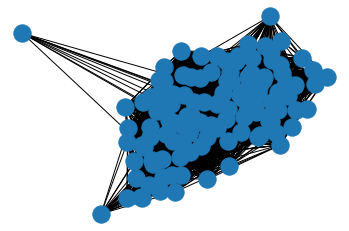

In [24]:
G1 = nx.read_weighted_edgelist(G1)
nx.draw_networkx(G1, with_labels=False)
plt.axis('off')
plt.show()

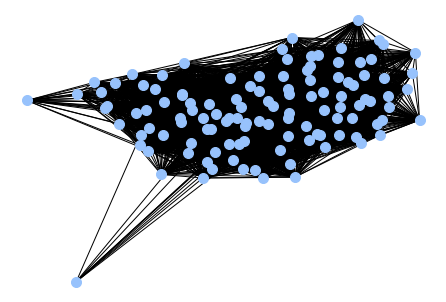

In [25]:
f = plt.figure()

nx.draw(G1, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')

f.savefig("C1G1.png")

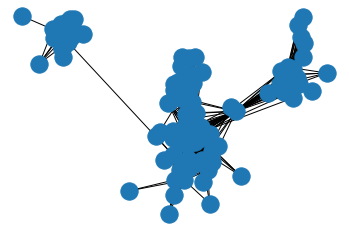

In [26]:
G2 = nx.read_weighted_edgelist(G2)
nx.draw_networkx(G2, with_labels=False)
plt.axis('off')
plt.show()

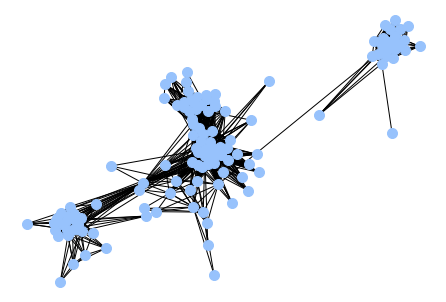

In [27]:
f = plt.figure()

nx.draw(G2, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')

f.savefig("C1G2.png")

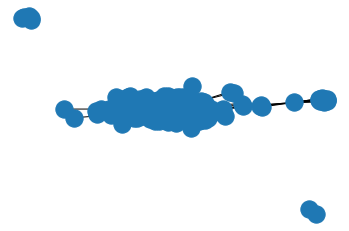

In [28]:
G3 = nx.read_weighted_edgelist(G3)
nx.draw_networkx(G3, with_labels=False)
plt.axis('off')
plt.show()

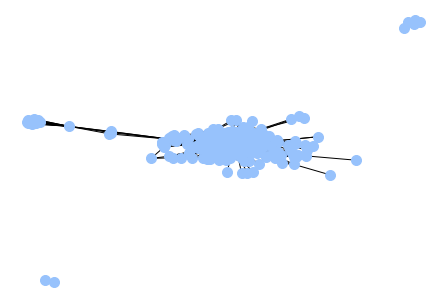

In [29]:
f = plt.figure()
pos = nx.spring_layout(G3)
nx.draw(G3, node_color='#97C2FC', node_size=100, edge_color='black', node_shape='o')

f.savefig("C1G3.png")

In [30]:
print ("n nodi:")
print (len(G1), len(G2), len(G3))
print ("n archi:")
print (G1.number_of_edges(), G2.number_of_edges(), G3.number_of_edges())

n nodi:
118 131 291
n archi:
4709 1444 3182


In [31]:
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

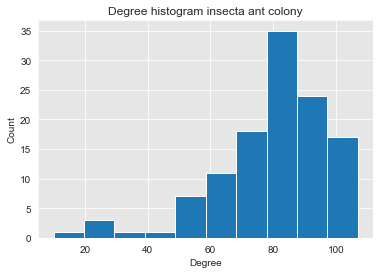

In [32]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree")
    plt.ylabel("Count")
    
    #plt.show()
    

plot_degree_dist(G1)
plt.title("Degree histogram insecta ant colony")
plt.savefig("histC1G1.png")


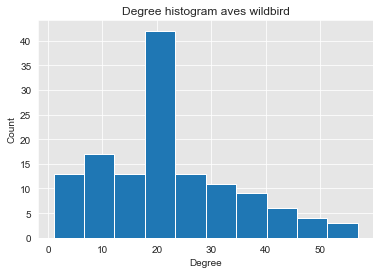

In [33]:
plot_degree_dist(G2)
plt.title("Degree histogram aves wildbird")
plt.savefig("histC1G2.png")

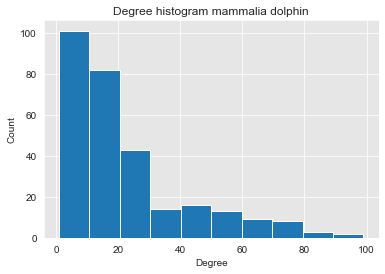

In [34]:
plot_degree_dist(G3)
plt.title("Degree histogram mammalia dolphin")
plt.savefig("histC1G3.png")

In [28]:
print("Connected components: ")
print("Grafo 1: "+str(nx.number_connected_components(G1)))
print("Grafo 2: " +str(nx.number_connected_components(G2)))
print("Grafo 3: " +str(nx.number_connected_components(G3)))

Connected components: 
Grafo 1: 1
Grafo 2: 1
Grafo 3: 3


In [29]:
print("Average shortest paths:\n")


net_path = nx.average_shortest_path_length(G1)

print("Grafo 1: "+str(net_path))

er_path = nx.average_shortest_path_length(G2)

print("Grafo 2: "+str(er_path))

ba_path = nx.average_shortest_path_length(G3)

print("Grafo 3: " +str(ba_path))

Average shortest paths:

Grafo 1: 1.3179776908590468
Grafo 2: 2.7332941867293012


NetworkXError: Graph is not connected.

In [30]:
net_cc = nx.average_clustering(G1)
print('Grafo 1 network average cluster coefficient: ' + str(net_cc) + '\n')
e_net_cc = nx.average_clustering(G2)
print('Grafo 2 network average cluster coefficient: ' + str(e_net_cc) + '\n')
ba_net_cc = nx.average_clustering(G3)
print('Grafo 3 network average cluster coefficient: ' + str(ba_net_cc) + '\n')

Grafo 1 network average cluster coefficient: 0.7808862772207714

Grafo 2 network average cluster coefficient: 0.8030546782053469

Grafo 3 network average cluster coefficient: 0.6823326907114737



In [31]:
print("Densities: ")

net_cc = nx.density(G1)
print("Grafo 1: "+str(net_cc))
e_net_cc = nx.density(G2)
print("Grafo 2: "+str(e_net_cc))
ba_net_cc = nx.density(G3)
print("Grafo 3: "+str(ba_net_cc))

Densities: 
Grafo 1: 0.6821671736925974
Grafo 2: 0.16958308866705812
Grafo 3: 0.07541177864675909


In [10]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Sottografo `motif`

In [36]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

#### Rinomina nodi del grafo `G` in tuple `(livello, nodo)`

In [37]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)

    return G

#### Identify `motif` in `G`

In [38]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

#### Restituisce il mapping per la compressione

In [39]:
def zippa(results, nodes):
    # max_liv = max(results[0], key=lambda item:item[0])[0]
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))

        return mapping

---

####  Funzione `multicoll`:
- Output: Liste di nodi e archi da cui si ricava il grafo risultate
- Nelle compressioni multiple il livello è gestito implicitamente

In [40]:
G = rinomina(G1)

In [41]:
G.nodes()

NodeView(((0, '1'), (0, '2'), (0, '4'), (0, '6'), (0, '60'), (0, '8'), (0, '9'), (0, '10'), (0, '12'), (0, '13'), (0, '15'), (0, '16'), (0, '17'), (0, '19'), (0, '21'), (0, '22'), (0, '23'), (0, '27'), (0, '3'), (0, '29'), (0, '30'), (0, '31'), (0, '143'), (0, '102'), (0, '35'), (0, '36'), (0, '39'), (0, '40'), (0, '45'), (0, '46'), (0, '48'), (0, '49'), (0, '50'), (0, '51'), (0, '53'), (0, '54'), (0, '151'), (0, '5'), (0, '57'), (0, '58'), (0, '146'), (0, '62'), (0, '64'), (0, '66'), (0, '67'), (0, '68'), (0, '148'), (0, '70'), (0, '71'), (0, '33'), (0, '73'), (0, '150'), (0, '75'), (0, '76'), (0, '56'), (0, '78'), (0, '80'), (0, '81'), (0, '82'), (0, '153'), (0, '85'), (0, '86'), (0, '87'), (0, '88'), (0, '89'), (0, '91'), (0, '155'), (0, '94'), (0, '95'), (0, '96'), (0, '97'), (0, '98'), (0, '99'), (0, '100'), (0, '101'), (0, '104'), (0, '105'), (0, '157'), (0, '109'), (0, '158'), (0, '111'), (0, '113'), (0, '114'), (0, '108'), (0, '117'), (0, '119'), (0, '121'), (0, '159'), (0, '12

In [42]:
nodi = list(G.nodes())
nodi

[(0, '1'),
 (0, '2'),
 (0, '4'),
 (0, '6'),
 (0, '60'),
 (0, '8'),
 (0, '9'),
 (0, '10'),
 (0, '12'),
 (0, '13'),
 (0, '15'),
 (0, '16'),
 (0, '17'),
 (0, '19'),
 (0, '21'),
 (0, '22'),
 (0, '23'),
 (0, '27'),
 (0, '3'),
 (0, '29'),
 (0, '30'),
 (0, '31'),
 (0, '143'),
 (0, '102'),
 (0, '35'),
 (0, '36'),
 (0, '39'),
 (0, '40'),
 (0, '45'),
 (0, '46'),
 (0, '48'),
 (0, '49'),
 (0, '50'),
 (0, '51'),
 (0, '53'),
 (0, '54'),
 (0, '151'),
 (0, '5'),
 (0, '57'),
 (0, '58'),
 (0, '146'),
 (0, '62'),
 (0, '64'),
 (0, '66'),
 (0, '67'),
 (0, '68'),
 (0, '148'),
 (0, '70'),
 (0, '71'),
 (0, '33'),
 (0, '73'),
 (0, '150'),
 (0, '75'),
 (0, '76'),
 (0, '56'),
 (0, '78'),
 (0, '80'),
 (0, '81'),
 (0, '82'),
 (0, '153'),
 (0, '85'),
 (0, '86'),
 (0, '87'),
 (0, '88'),
 (0, '89'),
 (0, '91'),
 (0, '155'),
 (0, '94'),
 (0, '95'),
 (0, '96'),
 (0, '97'),
 (0, '98'),
 (0, '99'),
 (0, '100'),
 (0, '101'),
 (0, '104'),
 (0, '105'),
 (0, '157'),
 (0, '109'),
 (0, '158'),
 (0, '111'),
 (0, '113'),
 (0, '1

In [43]:
len(nodi)

118

In [44]:
lista1 = find_motifs(motif, G)
len(lista1)


598176

In [45]:
lista1

[{1: (0, '1'), 3: (0, '2'), 2: (0, '29')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '86')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '22')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '68')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '99')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '105')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '158')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '159')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '96')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '127')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '70')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '45')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '91')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '104')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '153')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '109')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '102')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '135')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '162')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '64')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '124')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '111')},
 {1: (0, '1'), 3: (0, '2'), 2: (0, '57')},

In [46]:
ris = identify(motif, G)
ris

[[(0, '1'), (0, '10'), (0, '100')],
 [(0, '1'), (0, '10'), (0, '101')],
 [(0, '1'), (0, '10'), (0, '104')],
 [(0, '1'), (0, '10'), (0, '105')],
 [(0, '1'), (0, '10'), (0, '108')],
 [(0, '1'), (0, '10'), (0, '109')],
 [(0, '1'), (0, '10'), (0, '113')],
 [(0, '1'), (0, '10'), (0, '117')],
 [(0, '1'), (0, '10'), (0, '12')],
 [(0, '1'), (0, '10'), (0, '123')],
 [(0, '1'), (0, '10'), (0, '128')],
 [(0, '1'), (0, '10'), (0, '13')],
 [(0, '1'), (0, '10'), (0, '133')],
 [(0, '1'), (0, '10'), (0, '135')],
 [(0, '1'), (0, '10'), (0, '146')],
 [(0, '1'), (0, '10'), (0, '148')],
 [(0, '1'), (0, '10'), (0, '15')],
 [(0, '1'), (0, '10'), (0, '151')],
 [(0, '1'), (0, '10'), (0, '153')],
 [(0, '1'), (0, '10'), (0, '157')],
 [(0, '1'), (0, '10'), (0, '158')],
 [(0, '1'), (0, '10'), (0, '159')],
 [(0, '1'), (0, '10'), (0, '160')],
 [(0, '1'), (0, '10'), (0, '161')],
 [(0, '1'), (0, '10'), (0, '162')],
 [(0, '1'), (0, '10'), (0, '19')],
 [(0, '1'), (0, '10'), (0, '21')],
 [(0, '1'), (0, '10'), (0, '22')]

In [47]:
def multicoll(G):
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    # chiama identify
    ris = identify(motif, G)
    while ris != []:
        ris = identify(motif, G)
        mapping = zippa(ris, nodi)
        G = nx.relabel_nodes(G, mapping)
        # togli triangolo usato
        # la lista ris diminuisce
        ris = ris[1:]
        # i nodi cambiano, sono il risultato della compressione
        nodi = list(G.nodes())
        nodi.sort(key=lambda x:x[1])
        archi = list(G.edges())
        n.append(nodi)
        a.append(archi)
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))

    return res

In [48]:
res = multicoll(G)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

IndexError: list index out of range

In [ ]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---

#### MEMORIZZA merge, per poter ricostruire inversamente
Ora funziona con il primo mapping, da rendere iterabile

In [31]:
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])
ris = identify(motif, G)
mapping = zippa(ris, nodi)
m = zippa(ris, nodi)

In [32]:
# Memorizza [(0, 1), (0, 7), (0, 8)] = (1, 1)
m

{(0, '1'): (1, '1'),
 (0, '10'): (0, '10'),
 (0, '100'): (0, '100'),
 (0, '101'): (0, '101'),
 (0, '102'): (0, '102'),
 (0, '103'): (0, '103'),
 (0, '104'): (0, '104'),
 (0, '105'): (0, '105'),
 (0, '106'): (0, '106'),
 (0, '107'): (0, '107'),
 (0, '108'): (0, '108'),
 (0, '109'): (0, '109'),
 (0, '11'): (0, '11'),
 (0, '110'): (0, '110'),
 (0, '111'): (0, '111'),
 (0, '112'): (0, '112'),
 (0, '113'): (0, '113'),
 (0, '114'): (0, '114'),
 (0, '115'): (0, '115'),
 (0, '116'): (0, '116'),
 (0, '117'): (0, '117'),
 (0, '118'): (0, '118'),
 (0, '119'): (0, '119'),
 (0, '12'): (1, '1'),
 (0, '120'): (0, '120'),
 (0, '121'): (0, '121'),
 (0, '122'): (0, '122'),
 (0, '123'): (0, '123'),
 (0, '124'): (0, '124'),
 (0, '125'): (0, '125'),
 (0, '126'): (0, '126'),
 (0, '127'): (0, '127'),
 (0, '128'): (0, '128'),
 (0, '129'): (0, '129'),
 (0, '130'): (0, '130'),
 (0, '131'): (0, '131'),
 (0, '132'): (0, '132'),
 (0, '133'): (0, '133'),
 (0, '134'): (0, '134'),
 (0, '135'): (0, '135'),
 (0, '136')

In [33]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

# n fisso a 3 perché graphlet di 3 nodi
memo(m, 3)

{(1, '1'): [(0, '1'), (0, '12'), (0, '18')]}

***

### Indici

**Nodi compressi e nodi mantenuti, count e %**

In [34]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)

nodes_decrease(num_nodi)

(8, 4.145077720207254, 185, 95.85492227979275)

#### Statistiche per livello

In [35]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\nArchi: ", i[1][2], "\n\n")

Livello:  0 
# nodi:  193 
Nodi:  [(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '130'), (0, '131'), (0, '132'), (0, '133'), (0, '134'), (0, '135'), (0, '136'), (0, '137'), (0, '138'), (0, '139'), (0, '14'), (0, '140'), (0, '141'), (0, '142'), (0, '143'), (0, '144'), (0, '145'), (0, '146'), (0, '147'), (0, '148'), (0, '149'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '156'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '163'), (0, '164'), (0, '165'), (0, '166'), (0, '167'), (0, '168'), (0, '169'), (0, '17'), (0, '170'), (0, '171'), (0, '172'), (0

---

#### Testare la funzione anche con altri motif

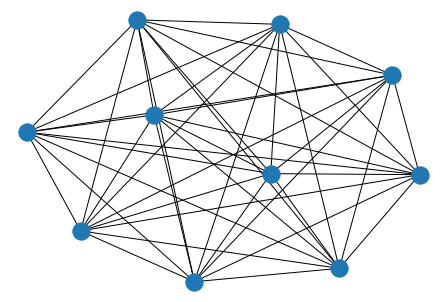

In [17]:
G0 = nx.complete_graph(10, create_using=None)
G = rinomina(G0)
nx.draw(G)

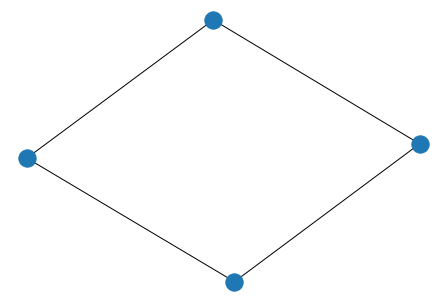

In [18]:
motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
nx.draw(motif)

In [19]:
ris = identify(motif, G)
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])

In [20]:
res = multicoll(G)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2] 
# nodi:  [10, 4, 1] 
Nodi:  [[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)], [(1, 0), (1, 4), (0, 8), (0, 9)], [(2, 0)]] 
Archi:  [[((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (0, 6)), ((0, 0), (0, 7)), ((0, 0), (0, 8)), ((0, 0), (0, 9)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 1), (0, 5)), ((0, 1), (0, 6)), ((0, 1), (0, 7)), ((0, 1), (0, 8)), ((0, 1), (0, 9)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 2), (0, 6)), ((0, 2), (0, 7)), ((0, 2), (0, 8)), ((0, 2), (0, 9)), ((0, 3), (0, 4)), ((0, 3), (0, 5)), ((0, 3), (0, 6)), ((0, 3), (0, 7)), ((0, 3), (0, 8)), ((0, 3), (0, 9)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 4), (0, 7)), ((0, 4), (0, 8)), ((0, 4), (0, 9)), ((0, 5), (0, 6)), ((0, 5), (0, 7)), ((0, 5), (0, 8)), ((0, 5), (0, 9)), ((0, 6), (0, 7)), ((0, 6), (0, 8)), ((0, 6), (0, 9)), ((0, 7), (0, 8)), ((0, 7), (0, 9)), ((0, 8), (0, 9))], [(

[((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (0, 6)), ((0, 0), (0, 7)), ((0, 0), (0, 8)), ((0, 0), (0, 9)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 1), (0, 5)), ((0, 1), (0, 6)), ((0, 1), (0, 7)), ((0, 1), (0, 8)), ((0, 1), (0, 9)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 2), (0, 6)), ((0, 2), (0, 7)), ((0, 2), (0, 8)), ((0, 2), (0, 9)), ((0, 3), (0, 4)), ((0, 3), (0, 5)), ((0, 3), (0, 6)), ((0, 3), (0, 7)), ((0, 3), (0, 8)), ((0, 3), (0, 9)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 4), (0, 7)), ((0, 4), (0, 8)), ((0, 4), (0, 9)), ((0, 5), (0, 6)), ((0, 5), (0, 7)), ((0, 5), (0, 8)), ((0, 5), (0, 9)), ((0, 6), (0, 7)), ((0, 6), (0, 8)), ((0, 6), (0, 9)), ((0, 7), (0, 8)), ((0, 7), (0, 9)), ((0, 8), (0, 9))]


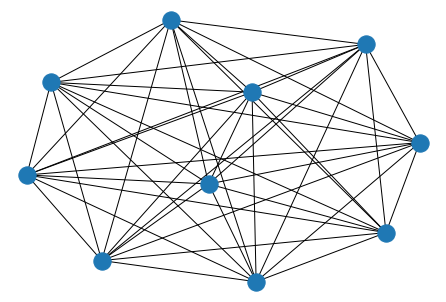

[((1, 0), (1, 0)), ((1, 0), (1, 4)), ((1, 0), (0, 8)), ((1, 0), (0, 9)), ((1, 4), (1, 4)), ((1, 4), (0, 8)), ((1, 4), (0, 9)), ((0, 8), (0, 9))]


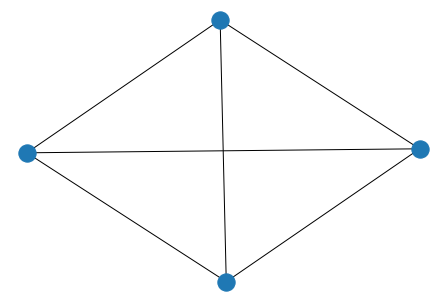

[((2, 0), (2, 0))]


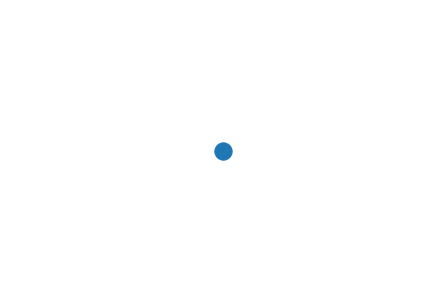

In [21]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---